In [113]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [114]:
sourceFilesPrefix="ExpectedResults\\music-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [115]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

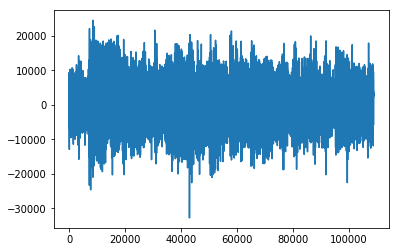

In [116]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

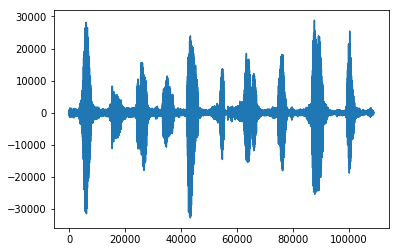

In [117]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [118]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.08406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.15270211  0.08406566]
 [ 0.90514896  0.53725471]]


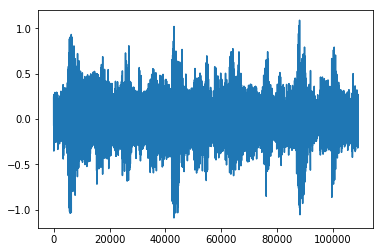

In [119]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [120]:
Audio(data=X[0], rate=16000)

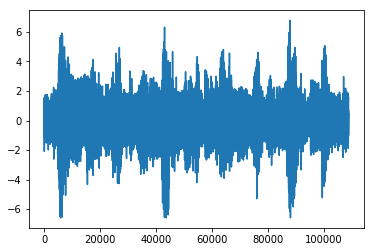

In [121]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [122]:
Audio(data=X[1], rate=16000)

In [123]:
eta=0.01
eta0=eta
T=1000
num_iter=10000

W=np.random.random([n,n])/100
print("Initial guessed decomposition matrix: \n"+str(W))
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))

Initial guessed decomposition matrix: 
[[ 0.00114845  0.00387759]
 [ 0.00678613  0.00744755]]


[[-0.68380414  0.11494167]
 [ 0.32777035 -0.05058032]]


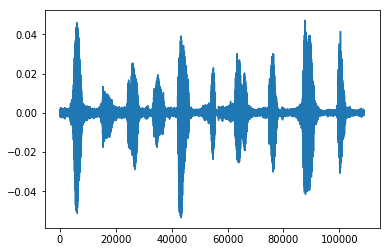

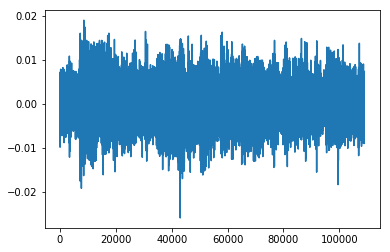

In [124]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [125]:
Audio(data=Y2[0], rate=16000)

In [126]:
Audio(data=Y2[1], rate=16000)